In [ ]:
#EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv('cleaned_London_data.csv')
data.head() 

,Price,House_Type,Area,Bedrooms,Bathrooms,Receptions,Location,County,Central_London_Flag,Area_Classifier
0,650000,Flat / Apartment,814,2,2,2,Islington,London,Yes,small
1,735000,Flat / Apartment,761,2,2,2,Wandsworth,London,No,small
2,675000,Flat / Apartment,700,2,2,2,Wandsworth,London,No,small
3,420000,Flat / Apartment,403,1,1,1,Westminster,London,No,small
4,650000,New development,560,1,1,1,Hammersmith and Fulham,London,No,small


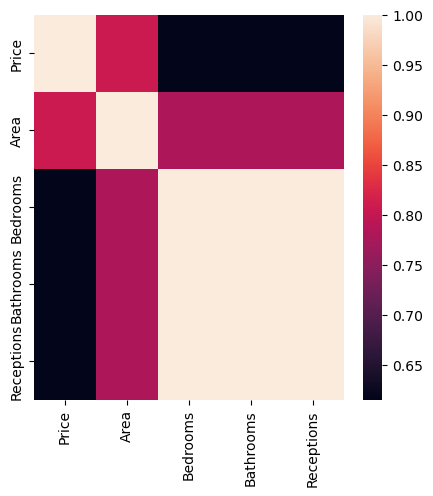

In [92]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat);

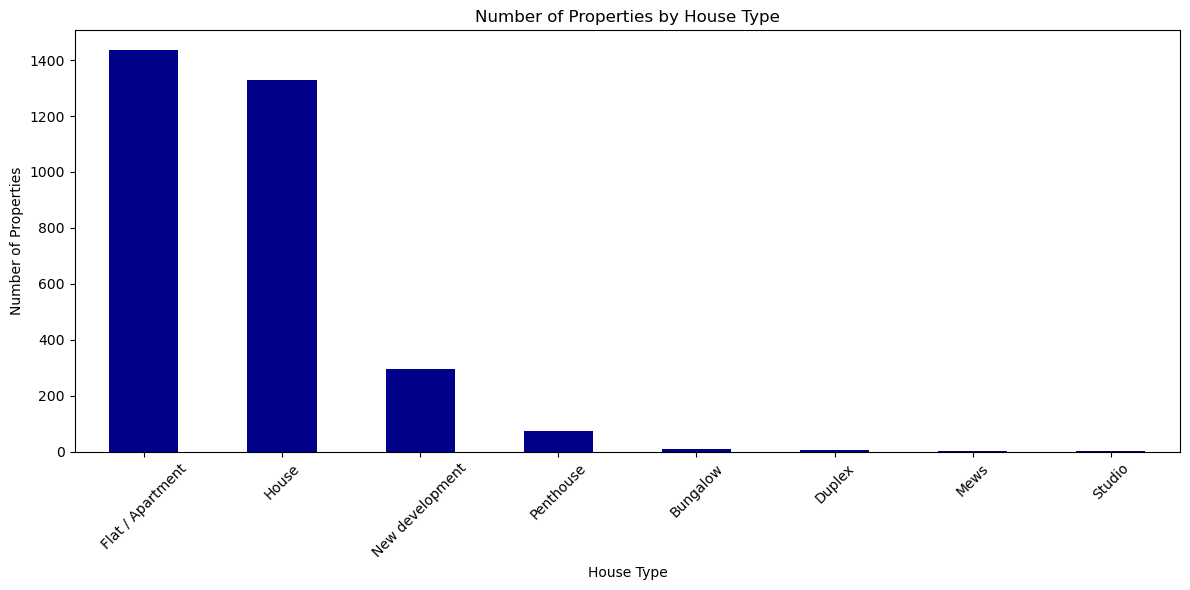

In [93]:
import matplotlib.pyplot as plt

# Group by 'House_Type' and count the number of properties for each type
house_type_counts = data['House_Type'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
house_type_counts.plot(kind='bar', color='darkblue')
plt.title('Number of Properties by House Type')
plt.xlabel('House Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


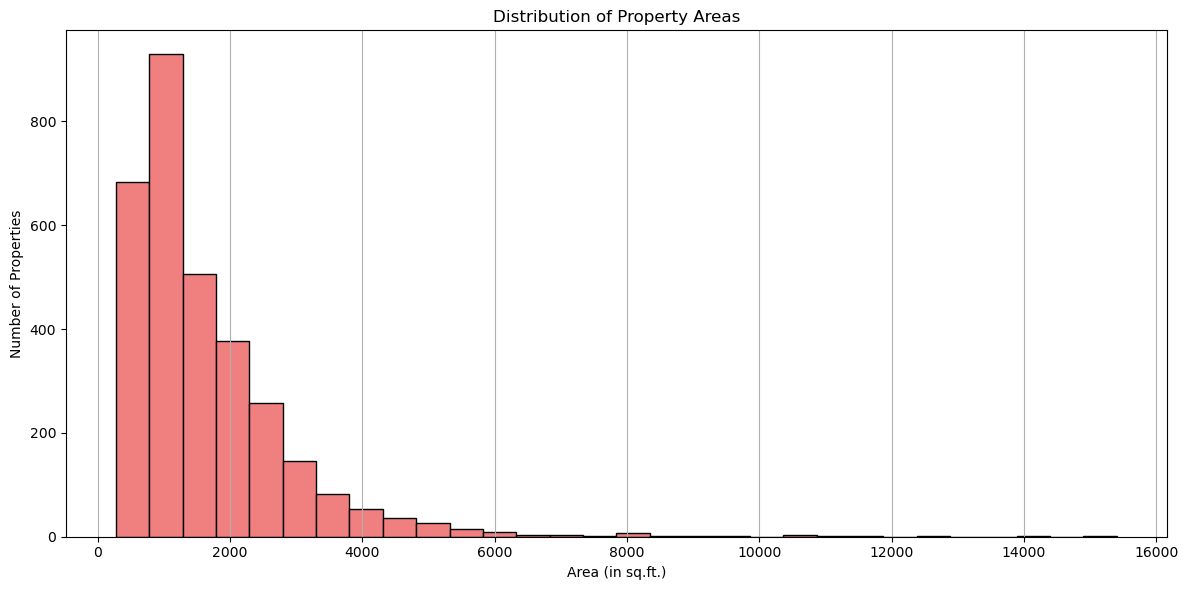

In [114]:
# Loading the dataset again
df = pd.read_csv("cleaned_London_data.csv")

# Plotting the distribution of property areas
plt.figure(figsize=(12, 6))
df['Area'].hist(bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Property Areas')
plt.xlabel('Area (in sq.ft.)')
plt.ylabel('Number of Properties')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


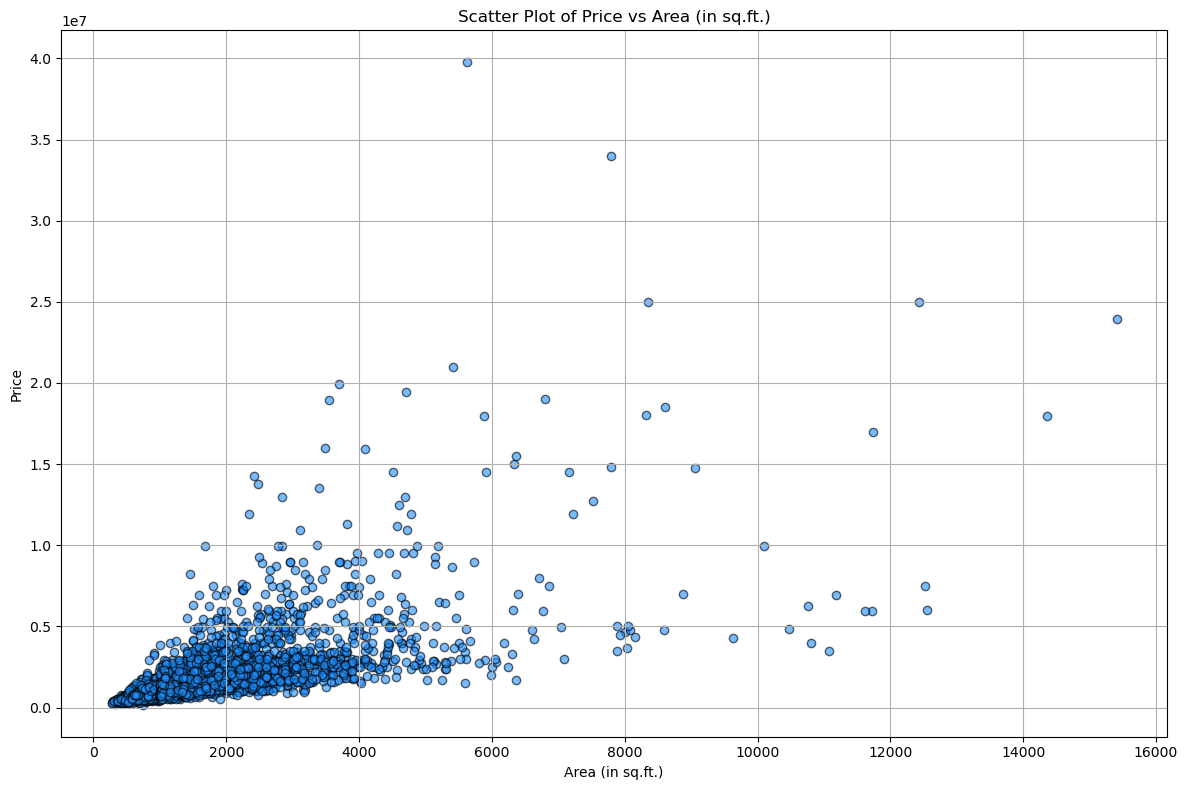

In [96]:
data_backup = pd.read_csv('London.csv')
# Plotting a scatter plot for 'Price' vs 'Area in sq ft'
plt.figure(figsize=(12, 8))
plt.scatter(data_backup['Area in sq ft'], data_backup['Price'], alpha=0.6, color='dodgerblue', edgecolor='black')
plt.title('Scatter Plot of Price vs Area (in sq.ft.)')
plt.xlabel('Area (in sq.ft.)')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


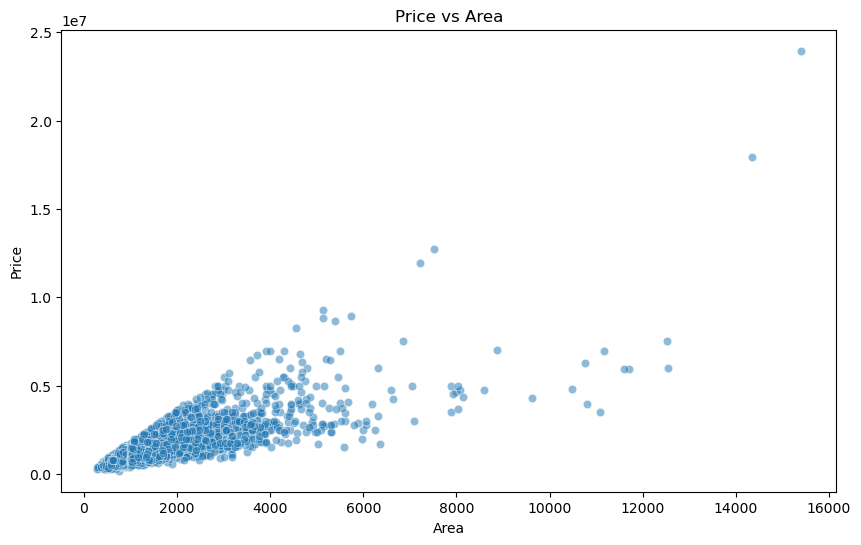

In [101]:

# Scatter plot for Price vs Area in the cleaned dataset
import seaborn as sns
import pandas as pd

# Reload the dataset
data = pd.read_csv('cleaned_London_data.csv')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Area'], y=data['Price'], alpha=0.5)
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import pickle 


# Load the dataset
data = pd.read_csv('cleaned_London_data.csv')


# Define the target variable and the feature matrix
y = data['Price']
X = data.drop(['Price'], axis=1)

# Define the categorical and numerical variables
categorical_vars = ['House_Type','County','Location','Area_Classifier','Central_London_Flag']

# Update the numerical_vars list to include the new features
numerical_vars = list(set(X.columns) - set(categorical_vars))

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the preprocessing steps for the categorical and numerical variables
categorical_preprocessor = OneHotEncoder(handle_unknown='ignore')
numerical_preprocessor = StandardScaler()

# Create a preprocessor that applies the appropriate steps to the categorical and numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_preprocessor, numerical_vars),
        ('cat', categorical_preprocessor, categorical_vars)
    ])

# Define the models with fixed random_state for reproducibility
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso', Lasso(max_iter=1000)),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor())
]

# Initialize the metrics results
results = []

# Calculate the metrics for each model
for name, model in models:
    # Create a pipeline that preprocesses the data and then applies the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Use the model to make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate the metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mse, mae, mape, r2])

# Convert the results to a DataFrame
metrics_df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'MAPE', 'R2'])

print(metrics_df)

# Extract the Random Forest model instance
rf_model = [model for name, model in models if name == 'Random Forest'][0]

# Save the Random Forest model using pickle
with open('random_forest_model_pickle.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
    
# Extract the pipeline for the Random Forest model
rf_pipeline = [pipeline for name, model in models if name == 'Random Forest'][0]

# Save the entire pipeline (including preprocessing) using pickle
with open('random_forest_pipeline.pkl', 'wb') as file:
    pickle.dump(rf_pipeline, file)




/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256522108411766.06, tolerance: 393331310452.5764
  model = cd_fast.sparse_enet_coordinate_descent(


                 Model                MSE          MAE    MAPE      R2
0    Linear Regression 301465195960.32477 341596.16534 0.26843 0.75829
1                Lasso 301582216375.65698 341704.98515 0.26878 0.75819
2        Decision Tree 324567322915.31317 330416.98996 0.22466 0.73976
3        Random Forest 208443411007.16992 265263.11990 0.18302 0.83287
4  K-Nearest Neighbors 249284648718.36743 294068.58193 0.19572 0.80012


In [112]:
# Extract the pipeline for the Lasso model, train it, and generate predictions
lr_pipeline = None
for name, model in models:
    if name == 'Linear Regression':
        lr_pipeline = pipeline
        y_pred_lr = lr_pipeline.predict(X_test)

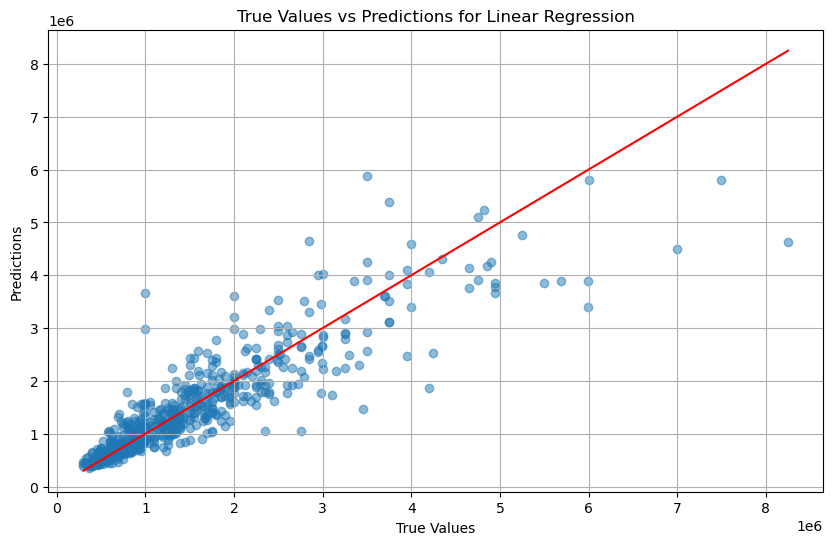

In [20]:
# Scatter plot of true values vs predictions for Linear Regression
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions for Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.grid(True)
plt.show()



In [31]:
# Extract the pipeline for the Lasso model, train it, and generate predictions
lasso_pipeline = None
for name, model in models:
    if name == 'Lasso':
        lasso_pipeline = pipeline
        y_pred_lasso = lasso_pipeline.predict(X_test)


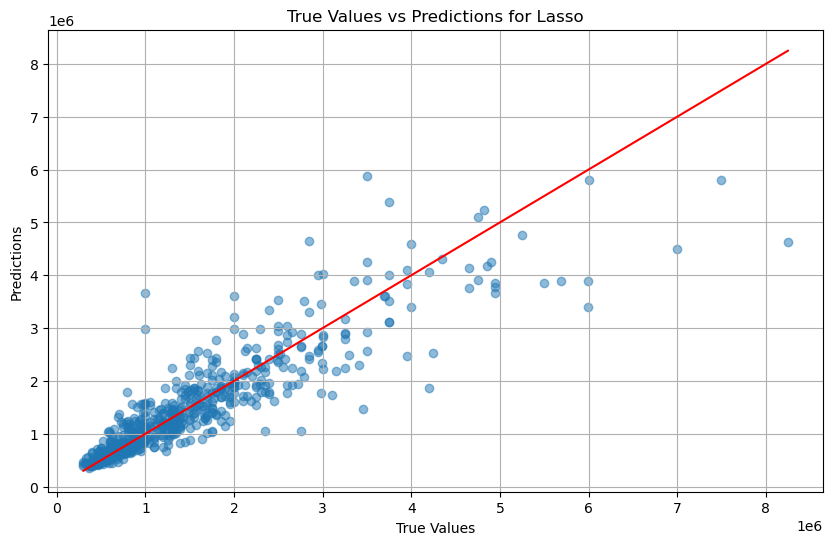

In [32]:
# Scatter plot of true values vs predictions for Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions for Lasso')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.grid(True)
plt.show()

In [33]:
# Extract the pipeline for the Decision Tree model, train it, and generate predictions
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state=42))])
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)


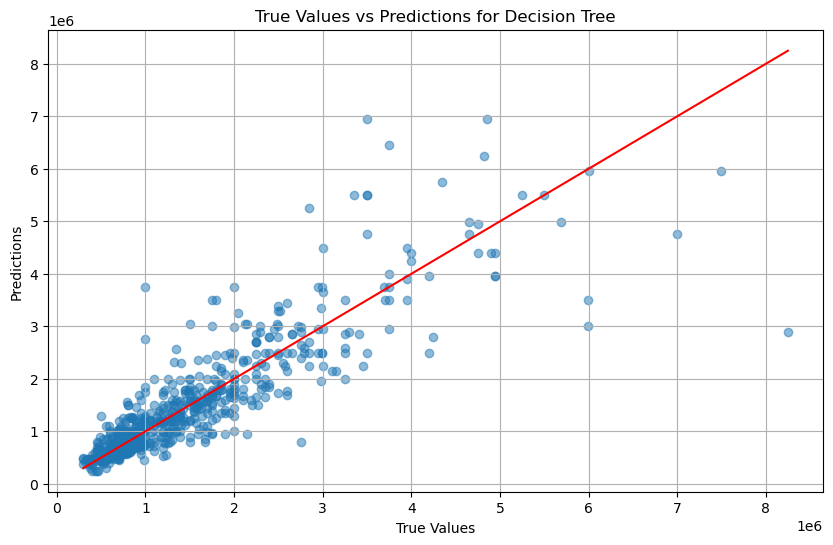

In [34]:
# Scatter plot of true values vs predictions for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions for Decision Tree')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.grid(True)
plt.show()

In [35]:
# Extract the pipeline for the Random Forest model, train it, and generate predictions
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

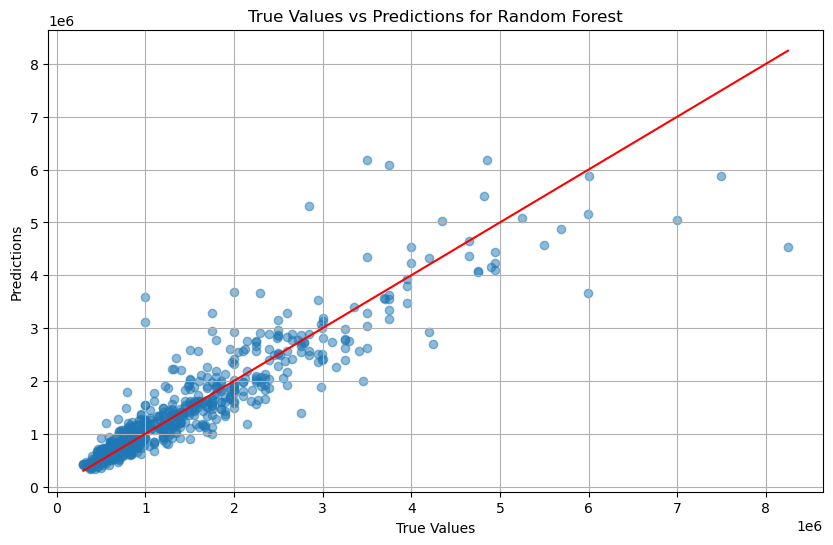

In [36]:
# Scatter plot of true values vs predictions for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions for Random Forest')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.grid(True)
plt.show()

In [37]:
# Extract the pipeline for the K-Nearest Neighbors (K-NN) model, train it, and generate predictions
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', KNeighborsRegressor())])
knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)


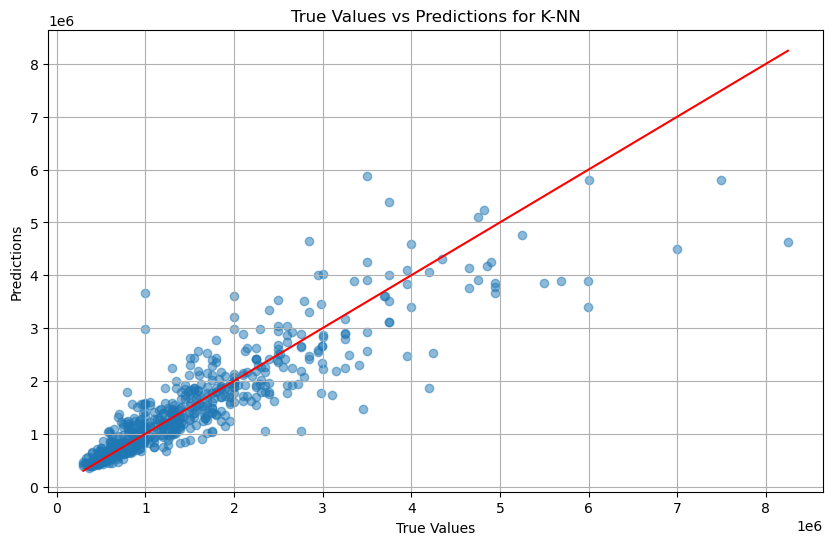

In [38]:
# Scatter plot of true values vs predictions for K-NN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions for K-NN')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.grid(True)
plt.show()